# Домашняя работа 8. Экспериментальная вероятность часть 3.

Вариант 3.

Лазарев Эдуард Артемович
N33471

## Задача

Мешалкин Сборник задач по теории вероятностей n 59.

В квадрат с вершинами (0, 0), (0, 1), (1,0), (1,1) наудачу брошена точка М. Пусть (x, y) будут ее координаты. Предполагается, что вероятность попадания в область, лежащую целиком внутри квадрата, зависит лишь от площади этой области и пропорциональна ей.

Найти для z = 1/4

P{min(x,y)<z}

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

In [2]:
import random
from scipy.special import binom

Пускай точность будет равна двум знакам после запятой.

Объявляем процедуру эксперемента

In [3]:
def experiment(n, prob_series=None):
    """
    Проводит n эксперементов и возвращает отношение 
    благоприятных исходов ко всем исходам.
    """

    # Количество событий в которых min(x, y) < z.
    k_success = 0
    
    z = 1 / 4

    for iteration in range(1, n + 1):
        # выбираем точку на плоскости.
        x = random.random()
        y = random.random()

        # Это благоприятный исход, если min(x, y) < z.
        if min(x, y) < z:
            k_success += 1

        if prob_series is not None:
            prob_series.append(k_success / iteration)

    return k_success / n

Проведём миллион эксперементов и посмотрим на сходимость 
нашей оценки к какому-нибудь числу.

In [4]:
N = 1000000
prob_series = []

p = experiment(N, prob_series=prob_series)

print(f"Полученная вероятность события: {p=}")

Полученная вероятность события: p=0.437136


In [5]:
# Убираем первые элементы из серии вероятностей, потому что они 
# имеют слишком большой разброс в начале и на графике ничего из-за 
# этого не будет видно.
removed_in_begin = 100000
prob_series_short = prob_series[removed_in_begin:]

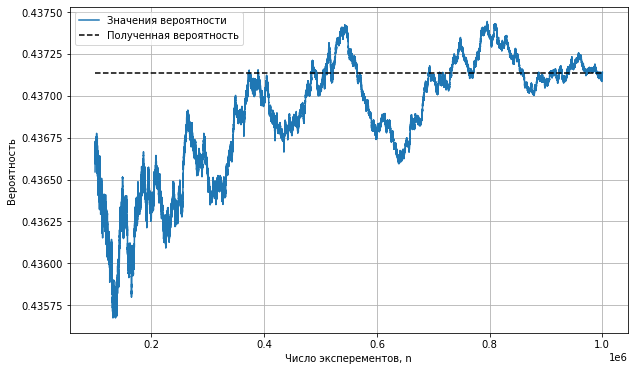

In [6]:
x = range(removed_in_begin, N)
plt.plot(x, prob_series_short, label='Значения вероятности')
plt.plot([removed_in_begin, N - 1], [p, p], ls="--", color="black", label='Полученная вероятность')
plt.xlabel("Число эксперементов, n")
plt.ylabel("Вероятность")
plt.legend()
plt.grid()

Видим, что при увеличении числа экспериментов оценка вероятности сходится к значению 0.437.

Проведём серии по пять вычислений вероятностей для N эксперементов и 2N эксперементов.
Проверим что оценка вероятности не изменяется (с точностью два знака после запятой).

In [7]:
probabilities = []
probabilities_2 = []

for i in range(5):
    probabilities.append(experiment(N))
    probabilities_2.append(experiment(N * 2))
    print(f"\r{(i + 1) * 20}%", end="")

100%

In [8]:
print(f"Полученные вероятности при {N} эксперементах: {probabilities}")
print(f"Среднее арифметическое: {round(np.mean(probabilities), 2)}\n")
print(f"Полученные вероятности при {2 * N} эксперементах: {probabilities_2}")
print(f"Среднее арифметическое: {round(np.mean(probabilities_2), 2)}\n")

Полученные вероятности при 1000000 эксперементах: [0.438623, 0.437038, 0.437248, 0.436942, 0.437713]
Среднее арифметическое: 0.44

Полученные вероятности при 2000000 эксперементах: [0.4373305, 0.4374945, 0.437401, 0.437357, 0.437718]
Среднее арифметическое: 0.44



Видим что при увеличении числа экспериментов оценка вероятности не меняется.

Проведём аналитическое решение для проверки результатов.

Формула по которой будем проверять:

$$p = 1 - (1 - z)^2$$

На рисунке ниже можно видеть облась в которую нужно попасть точке.

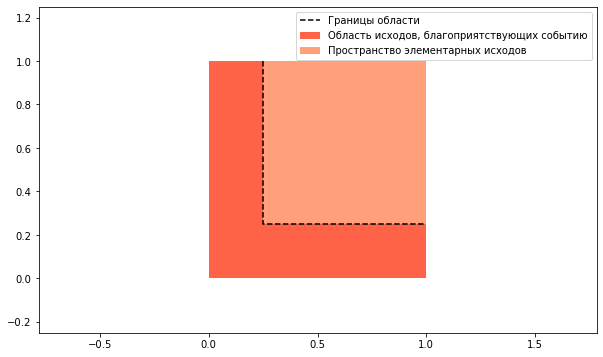

In [9]:
z = 1/4

plt.axis('equal')
plt.fill([0, 0, 1, 1], [0, 1, 1, 0], facecolor='tomato',
         label="Область исходов, благоприятствующих событию")
plt.fill([z, z, 1, 1], [z, 1, 1, z], facecolor='lightsalmon',
         label="Пространство элементарных исходов")
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)

plt.plot([z, z, 1], [1, z, z], ls="--", color="black",
         label="Границы области")

plt.legend()
plt.show()

In [10]:
p_analitic = 1 - (1 - z) ** 2

print(f"Аналитическое решение: {p_analitic}")
print(f"Полученная оценка вероятности: {p}")

Аналитическое решение: 0.4375
Полученная оценка вероятности: 0.437136


Видим что вероятность близка к истиной. 

## Вывод
Значение полученной экспериментальной вероятности p = 0.44 соответствует результатам расчета в пределах заданной точности. Кроме того, увеличение количества экспериментов в два раза не влияет на оценку. Следовательно, в ходе эксперимента было получено корректное значение экспериментальой вероятности.